In [1]:
? clear

In [4]:
#import pylab

# Sample datasets in "sklearn.datasets"

Python machine learning library "sklearn" has major machine learning data sets and we can get them easily.
At first time you get the data, it take time to download the data.

In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original', data_home=".")
print("Load MINST data")

Load MINST data


# Showing sample data in MNIST


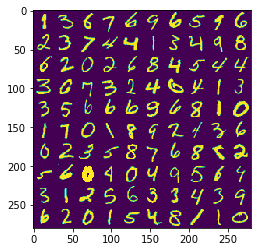

In [3]:
import numpy as np
import matplotlib.pylab as plt

imgSizeX = 28; #x-axis size of image
imgSizeY = 28; #y-axis size of image

m = np.shape(mnist.data)[0]; # num of dataset

sample_show_sizeX = 10; # num of x-axis of showing data samples
sample_show_sizeY = 10; # num of y-axis of showing data samples

sampleIdx = np.random.choice(m, sample_show_sizeX * sample_show_sizeY, replace=False);
mnistSample = mnist.data[sampleIdx];
mnistSample = np.reshape(mnistSample, ((sample_show_sizeX * sample_show_sizeY), imgSizeX, imgSizeY));


img = np.zeros((imgSizeX * sample_show_sizeX, imgSizeX * sample_show_sizeY));

for i in np.arange(0, sample_show_sizeX):
    for j in np.arange(0, sample_show_sizeY):
        img[i * imgSizeX: (i + 1) * imgSizeX, j * imgSizeY: (j + 1) * imgSizeY] = mnistSample[i * sample_show_sizeX + j]


plt.imshow(img)
plt.show()

# Neural Network Cost Function

Neural Network evaluation is often called "Forward Propergation"

In [64]:
input_layer_size  = imgSizeX * imgSizeY;  # 28x28 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = np.size(np.unique(mnist.target));  

initial_Theta1 = np.random.normal(0.0, 1 / np.sqrt(input_layer_size + 1), (input_layer_size + 1) * hidden_layer_size);
initial_Theta2 = np.random.normal(0.0, 1 / np.sqrt(hidden_layer_size + 1), (hidden_layer_size + 1) * num_labels);
nn_params = np.concatenate((initial_Theta1, initial_Theta2), axis = 0)

X = mnist.data;
y = mnist.target;
_lambda = 0.1


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, 
                   X, y, _lambda):
    Theta1 = np.reshape(
                    nn_params[0: hidden_layer_size * (input_layer_size + 1)], 
                            (hidden_layer_size, input_layer_size + 1));
    Theta2 = np.reshape(
                    nn_params[hidden_layer_size * (input_layer_size + 1):],
                            (num_labels, (hidden_layer_size + 1)));
    m = np.shape(X)[0];
    
    a1 = np.concatenate((np.ones((m, 1)), X), axis = 1);
    z2 = np.dot(a1, Theta1.T);
    a2 = sigmoid(z2);
    
    a2 = np.concatenate((np.ones((m, 1)), a2), axis = 1);
    z3 = np.dot(a2, Theta2.T);
    a3 = sigmoid(z3);

    J = 0.0;
    for i in np.arange(0, num_labels):
        indexP = (y == i);
        J = J + -1 * np.sum(np.log(a3[indexP,i])) / m;
        indexN = (y != i);
        J = J + -1 * np.sum(np.log(1 - a3[indexN,i])) / m;


    Theta1_reg = Theta1[:,1:];
    Theta2_reg = Theta2[:,1:];
    J = J + _lambda * np.sum(Theta1_reg ** 2) / (2 * m);
    J = J + _lambda * np.sum(Theta2_reg ** 2) / (2 * m);
    
    return J


cost = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, _lambda);
print('Sample cost: %.5f' % cost)

Sample cost: 6.65379


# Back Propergation

There is very useful algorithm to calculate gradioent of neural network and it's called "Back Propergation".
Back Propergation is a algorithm to calculate difference of stacked function, it's not restricted to using gardient of neural network.


In [73]:
def sigmoidGradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

def nnCostFunctionGrad(nn_params, input_layer_size, hidden_layer_size, 
                           num_labels, X, y, _lambda):
    Theta1 = np.reshape(
                    nn_params[0: hidden_layer_size * (input_layer_size + 1)], 
                            (hidden_layer_size, input_layer_size + 1));
    Theta2 = np.reshape(
                    nn_params[hidden_layer_size * (input_layer_size + 1):],
                            (num_labels, (hidden_layer_size + 1)));
    m = np.shape(X)[0];
    
    a1 = np.concatenate((np.ones((m, 1)), X), axis = 1);
    z2 = np.dot(a1, Theta1.T);
    a2 = sigmoid(z2);
    
    a2 = np.concatenate((np.ones((m, 1)), a2), axis = 1);
    z3 = np.dot(a2, Theta2.T);
    a3 = sigmoid(z3);

    Y = np.zeros((m, num_labels));
    for i in np.arange(0, num_labels):
        Y[:,i] = (y.astype(np.int64) == i).astype(np.float64);


    delta3 = a3 - Y
    delta2 = sigmoidGradient(z2) * np.dot(delta3, Theta2[:,1:]);
    

    Theta2_grad = np.zeros((num_labels, hidden_layer_size + 1));
    Theta1_grad = np.zeros((hidden_layer_size, input_layer_size + 1));

    for i in np.arange(0, m):
       
        Theta2_grad \
            = Theta2_grad \
                + np.dot(np.reshape(delta3[i,:].T, (num_labels,1)), \
                         np.reshape(a2[i, :], (1, hidden_layer_size + 1))) / m
        Theta1_grad \
            = Theta1_grad \
                + np.dot(np.reshape(delta2[i,:].T, (hidden_layer_size,1)), \
                         np.reshape(a1[i, :], (1, input_layer_size + 1))) / m

    #Theta1_grad = Theta1_grad / m;
    #Theta2_grad = Theta2_grad / m;

    Theta1_reg = Theta1[:,1:];
    Theta2_reg = Theta2[:,1:];

    Theta1_grad =  Theta1_grad \
                        + (_lambda / m) \
                            * np.concatenate(
                                    (np.zeros((hidden_layer_size, 1)), 
                                     Theta1_reg), 
                                     axis = 1);
    Theta2_grad =  Theta2_grad \
                        + (_lambda / m) \
                            * np.concatenate(
                                    (np.zeros((num_labels, 1)), 
                                     Theta2_reg), 
                                     axis = 1);
    Theta_grad = np.concatenate(
                    (np.reshape(Theta1_grad, (np.size(Theta1_grad), 1)), 
                     np.reshape(Theta2_grad, (np.size(Theta2_grad), 1))), 
                     axis = 0);
    return Theta_grad[:, 0]

sampleGrad = nnCostFunctionGrad(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, _lambda);
print('Sample Gradient By Back Propergation:')
print(sampleGrad)


Sample Gradient By Back Propergation:
[  1.51339998e-03   1.46690974e-08  -1.70737041e-08 ...,   1.63974281e-02
   7.60971132e-02   1.46098830e-01]


# Numerical Difference

Even if gradient of any function is not simple, we can calculate differences numerically.
But it takes much computational cost and you should not use for the function which has many argments.

$f(x + \varepsilon) = f(x) + f'(x) \varepsilon + O({\varepsilon}^2) = f(x) + f'(x) \varepsilon + \frac{1}{2}  f''(x)\varepsilon^2 + O({\varepsilon}^3)$ 

and 

$f(x - \varepsilon) = f(x) - f'(x) \varepsilon + O({\varepsilon}^2) = f(x) - f'(x) \varepsilon + \frac{1}{2}  f''(x)\varepsilon^2 + O({\varepsilon}^3)$

Then 

$$\frac{f(x + \varepsilon) - f(x)}{\varepsilon} = f'(x)+ O({\varepsilon})$$


$$\frac{f(x) - f(x - \varepsilon)}{\varepsilon} = f'(x)+ O({\varepsilon})$$


$$\frac{f(x + \varepsilon) - f(x - \varepsilon)}{2\varepsilon} = f'(x)+ O({\varepsilon}^2)$$
 



In [114]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoidGradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

epsilon = 10e-4;
samplePoint = np.random.normal(0.0, 1, 1);
analyticDiff = sigmoidGradient(samplePoint);
forwardDiff = (sigmoid(samplePoint + epsilon) - sigmoid(samplePoint)) / epsilon;
backwardDiff = (sigmoid(samplePoint) - sigmoid(samplePoint - epsilon)) / epsilon;
CentralDiff = (sigmoid(samplePoint + epsilon) - sigmoid(samplePoint - epsilon)) / (2 * epsilon);


print('Sample Point : %.4f' % samplePoint);
print('Analytical Difference         : %.8f' % analyticDiff);
print('Numerical Forward Difference  : %.8f' % forwardDiff);
print('Numerical Backward Difference : %.8f' % analyticDiff);
print('Numerical Central Difference  : %.8f' % analyticDiff);


Sample Point : 2.0483
Analytical Difference         : 0.10117329
Numerical Forward Difference  : 0.10113427
Numerical Backward Difference : 0.10117329
Numerical Central Difference  : 0.10117329


# Check Gradient, Back Propergation vs Numerical Difference

In offen, learning sequence looks like going well even if gradient function is not correct.
But in such case, we cannot archive to optimezed parameters.
So we should test our gradient function against numerical difference.

Caution:We should never use numerical difference for model learning, it takes too long time.

"=" is call by reference for list, but in order to use is as numerical grad, we need to use call by value "copy.deepcopy(x)"

In [87]:
import copy

epsilon = 10e-4;
testX = X[:100,:];
testY = y[:100];
analyticalGrad = nnCostFunctionGrad(nn_params, input_layer_size, hidden_layer_size, num_labels, testX, testY, _lambda);

#paramSize = np.size(nn_params);
paramSize = 10;

# Usual "=" is call by reference, but in order to use is as numerical grad, we need to use call by value "copy.deepcopy(x)"
numericalGrad = np.zeros(paramSize);
for i in np.arange(0, paramSize):
    testParam = copy.deepcopy(nn_params);
    testParam[i] = testParam[i] + epsilon;
    forwadVal = nnCostFunction(testParam, input_layer_size, hidden_layer_size, num_labels, testX, testY, _lambda);
    testParam = copy.deepcopy(nn_params);
    testParam[i] = testParam[i] - epsilon;
    backwardVal = nnCostFunction(testParam, input_layer_size, hidden_layer_size, num_labels, testX, testY, _lambda);
    numericalGrad[i] = (forwadVal - backwardVal) / (2 * epsilon)

print('Back Propergation Grad :')
print(analyticalGrad[0:paramSize])
print('Numerical Grad :')
print(numericalGrad)


Back Propergation Grad :
[  2.16152519e-03   1.02683682e-05  -1.19515929e-05  -6.38891376e-06
  -2.08846726e-05  -1.20197083e-05  -1.64386275e-05  -4.95159052e-06
  -8.01682852e-07   1.92367740e-05]
Numerical Grad :
[  2.16152518e-03   1.02683684e-05  -1.19515926e-05  -6.38891384e-06
  -2.08846727e-05  -1.20197083e-05  -1.64386273e-05  -4.95159025e-06
  -8.01683164e-07   1.92367740e-05]
1.34380065493e-05


# scipy.optimize.check_grad
"scipy.optimize" has useful automatic gradient check function, ot return square error of between given gradiet function and numerical gradient

In [189]:
import scipy.optimize as opt

gradDiff = opt.check_grad(nnCostFunction, nnCostFunctionGrad, nn_params, \
                          input_layer_size, hidden_layer_size, num_labels, \
                          testX, testY, _lambda);
print('Square error of between analytical and numerical difference : %.8f' % gradDiff)

Square error of between analytical and numerical difference : 0.00000933


# Training Neural Network
We have preapred cost function and gradient function (and checked gradient function works well).Then lt's train our model.
I gad tried to train network with raw X, but it caused overflo. 
Therefor I regularized X and succeeded to train.

In [162]:
#testX = X[:10,:];
#testY = y[:10];

testX = X;
testY = y;


avgX = np.average((testX), axis = 0);
sigX = np.sqrt(np.var((testX), axis = 0));
regX = (testX - avgX) / (sigX + 10e-6);

initial_Theta1 = np.random.normal(0.0, 1 / np.sqrt(input_layer_size + 1), (input_layer_size + 1) * hidden_layer_size);
initial_Theta2 = np.random.normal(0.0, 1 / np.sqrt(hidden_layer_size + 1), (hidden_layer_size + 1) * num_labels);

nn_params = np.concatenate((initial_Theta1, initial_Theta2), axis = 0)

_lambda = 0.1;


opt_Theta = opt.fmin_cg(nnCostFunction, fprime=nnCostFunctionGrad, x0=nn_params, args=(input_layer_size, hidden_layer_size, num_labels, \
                         regX, testY, _lambda), maxiter=50, disp=False)

print('Optimized theta')
print(opt_Theta)


[-1.12706098 -0.01433988  0.04332573 ...,  0.61621215 -1.46887864
  1.4388238 ]


# Check accuracy

In [163]:
def predictData(nn_params, input_layer_size, hidden_layer_size, num_labels, X):
    Theta1 = np.reshape(
                    nn_params[0: hidden_layer_size * (input_layer_size + 1)], 
                            (hidden_layer_size, input_layer_size + 1));
    Theta2 = np.reshape(
                    nn_params[hidden_layer_size * (input_layer_size + 1):],
                            (num_labels, (hidden_layer_size + 1)));
    m = np.shape(X)[0];
    
    a1 = np.concatenate((np.ones((m, 1)), X), axis = 1);
    z2 = np.dot(a1, Theta1.T);
    a2 = sigmoid(z2);
    
    a2 = np.concatenate((np.ones((m, 1)), a2), axis = 1);
    z3 = np.dot(a2, Theta2.T);
    a3 = sigmoid(z3);

    return np.argmax(a3, axis = 1)

predict = predictData(opt_Theta, input_layer_size, hidden_layer_size, num_labels, regX);
accuracy = np.sum(predict == testY) / np.size(predict);
print('Accuracy ; %.2f%%' % (100 * accuracy))

Accuracy ; 97.26%


# Check failed data

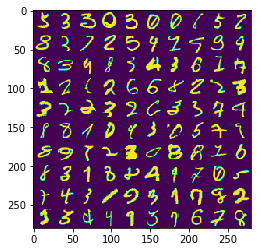

Target
[ 5.  3.  3.  0.  3.  0.  0.  6.  5.  2.]
[ 8.  3.  7.  2.  5.  4.  1.  9.  9.  9.]
[ 8.  3.  9.  8.  3.  4.  3.  6.  1.  7.]
[ 1.  2.  1.  2.  6.  6.  8.  2.  2.  3.]
[ 3.  2.  2.  3.  2.  6.  3.  3.  7.  4.]
[ 8.  8.  1.  0.  9.  3.  0.  5.  7.  9.]
[ 8.  9.  7.  2.  3.  0.  8.  8.  1.  6.]
[ 8.  3.  1.  8.  8.  4.  9.  7.  0.  5.]
[ 7.  4.  3.  1.  9.  3.  1.  7.  9.  2.]
[ 3.  3.  4.  4.  9.  3.  7.  6.  7.  8.]
Predict
[ 3.  8.  2.  6.  5.  8.  8.  1.  1.  8.]
[ 3.  2.  3.  8.  0.  9.  7.  5.  3.  4.]
[ 4.  5.  4.  1.  5.  0.  1.  0.  2.  4.]
[ 5.  5.  6.  9.  2.  5.  5.  8.  7.  8.]
[ 7.  7.  6.  2.  5.  0.  6.  5.  9.  9.]
[ 1.  3.  4.  2.  1.  1.  3.  3.  4.  1.]
[ 6.  7.  3.  4.  8.  2.  3.  2.  2.  0.]
[ 1.  2.  7.  3.  0.  2.  1.  2.  8.  8.]
[ 1.  9.  1.  8.  0.  9.  9.  9.  3.  0.]
[ 7.  5.  6.  9.  8.  5.  9.  5.  2.  2.]


In [186]:
imgSizeX = 28; #x-axis size of image
imgSizeY = 28; #y-axis size of image

m = np.shape(mnist.data)[0]; # num of dataset

sample_show_sizeX = 10; # num of x-axis of showing data samples
sample_show_sizeY = 10; # num of y-axis of showing data samples


failIdx = predict != testY;

mnistFailed = mnist.data[failIdx];
sampleIdx = np.random.choice(np.shape(mnistFailed)[0], sample_show_sizeX * sample_show_sizeY, replace=False);
mnistFailed = mnistFailed[sampleIdx];
mnistFailed = np.reshape(mnistFailed, ((sample_show_sizeX * sample_show_sizeY), imgSizeX, imgSizeY));

mnistFailedLabel = mnist.target[failIdx];
mnistFailedLabel = mnistFailedLabel[sampleIdx];

mnistFailedPredict = predict[failIdx];
mnistFailedPredict = mnistFailedPredict.astype(np.float32);
mnistFailedPredict = mnistFailedPredict[sampleIdx];

img = np.zeros((imgSizeX * sample_show_sizeX, imgSizeX * sample_show_sizeY));

for i in np.arange(0, sample_show_sizeX):
    for j in np.arange(0, sample_show_sizeY):
        img[i * imgSizeX: (i + 1) * imgSizeX, j * imgSizeY: (j + 1) * imgSizeY] = mnistFailed[i * sample_show_sizeX + j]


plt.imshow(img)
plt.show()

print('Target')
for i in np.arange(0, sample_show_sizeX):
        print(mnistFailedLabel[i * sample_show_sizeX: (i + 1) * sample_show_sizeX])

print('Predict')
for i in np.arange(0, sample_show_sizeX):
        print(mnistFailedPredict[i * sample_show_sizeX: (i + 1) * sample_show_sizeX])

# Visualizing Weights

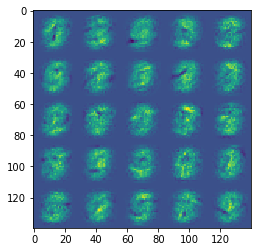

In [199]:
weight = np.reshape(opt_Theta[0: hidden_layer_size * (input_layer_size + 1)], \
                                (hidden_layer_size, input_layer_size + 1));

weight = avgX + (weight[:, 1:] * sigX);

weightSize = np.sqrt(hidden_layer_size).astype(np.int32);

weight = weight[0:(weightSize * weightSize), :];
weight = np.reshape(weight, ((weightSize * weightSize), imgSizeX, imgSizeY))
img = np.zeros((imgSizeX * weightSize, imgSizeY * weightSize));

for i in np.arange(0, weightSize):
    for j in np.arange(0, weightSize):
        img[i * imgSizeX: (i + 1) * imgSizeX, j * imgSizeY: (j + 1) * imgSizeY] = weight[i * weightSize + j]
        
plt.imshow(img)
plt.show()
        